In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel('DataSet.xlsx')

In [64]:
df.shape

(10683, 11)

In [65]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [66]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [68]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [69]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0.1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Route 0.0001  % missing values
Total_Stops 0.0001  % missing values


In [70]:
df.dropna(axis = 0 , inplace=True)

In [71]:
for x in df.columns:
    print(x,':',df[x].nunique())

Airline : 12
Date_of_Journey : 44
Source : 5
Destination : 6
Route : 128
Dep_Time : 222
Arrival_Time : 1343
Duration : 368
Total_Stops : 5
Additional_Info : 10
Price : 1870


In [72]:
for x in df.columns:
    print(x,':',df[x].unique())

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey : ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route : ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU →

In [73]:
list(df.columns)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

## Airline

In [74]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

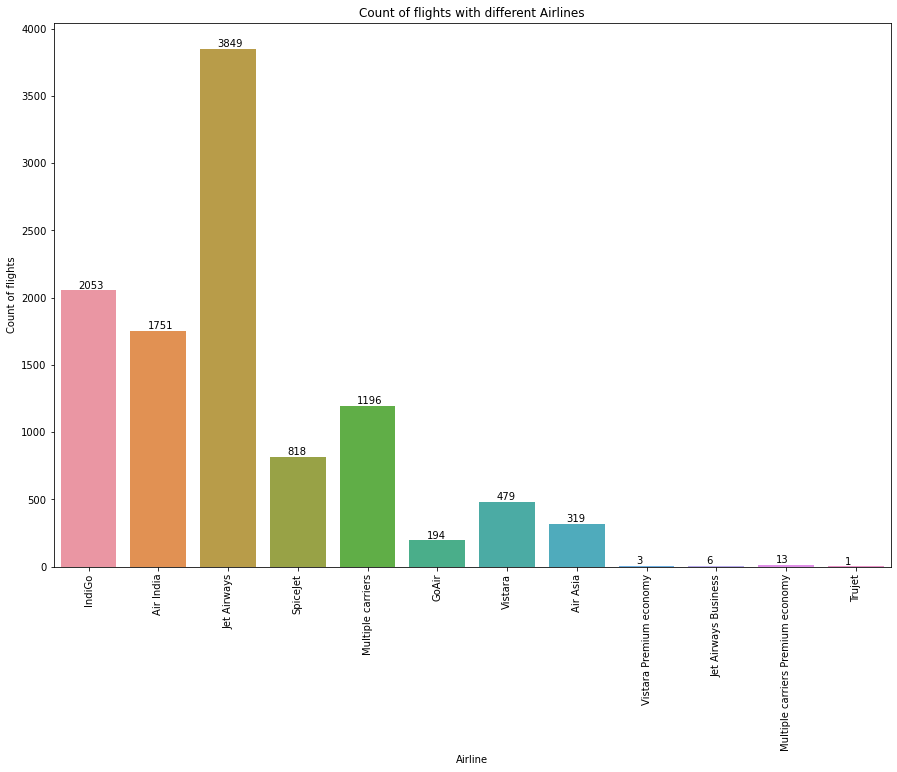

In [75]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for x in ax.patches:
    ax.annotate(int(x.get_height()), (x.get_x()+0.25, x.get_height()+1), va='bottom',
                    color= 'black')

## Date of Journey

In [76]:
df.Date_of_Journey.value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

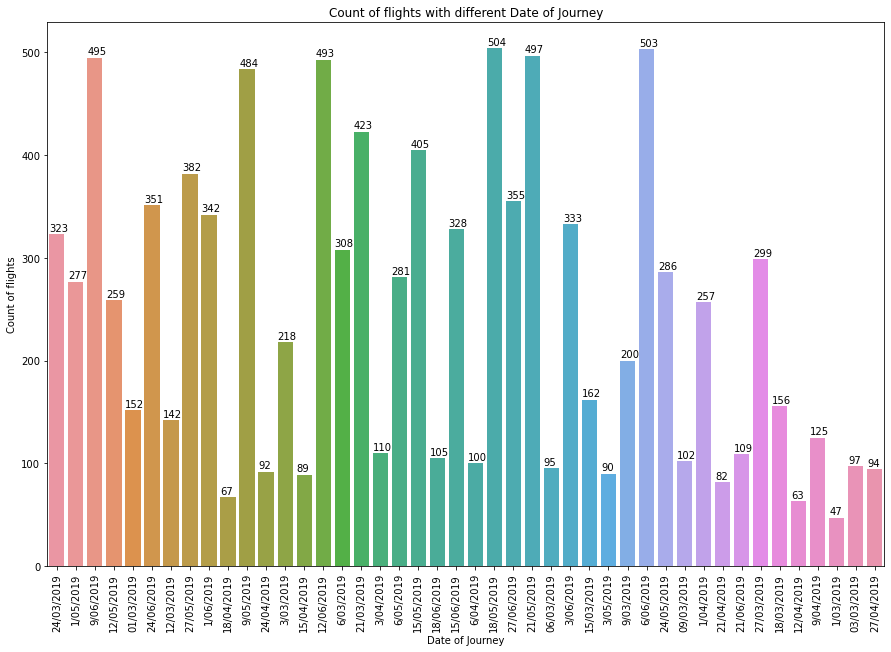

In [77]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Date of Journey')
ax=sns.countplot(x = 'Date_of_Journey', data =df)
plt.xlabel('Date of Journey')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for x in ax.patches:
    ax.annotate(int(x.get_height()), (x.get_x()+0.00, x.get_height()+1), va='bottom',
                    color= 'black')

## Source

In [78]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

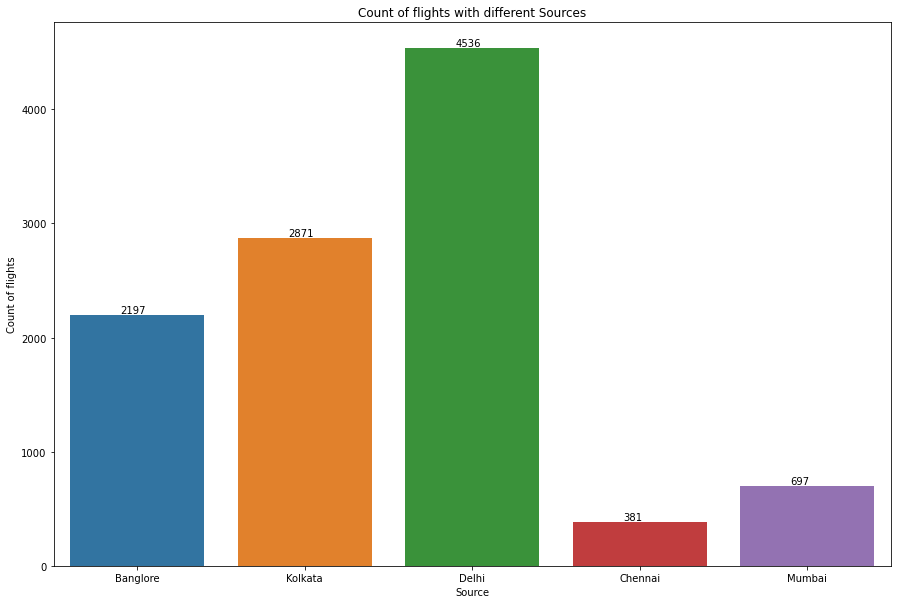

In [79]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Sources')
ax=sns.countplot(x = 'Source', data =df)
plt.xlabel('Source')
plt.ylabel('Count of flights')
for x in ax.patches:
    ax.annotate(int(x.get_height()), (x.get_x()+0.30, x.get_height()+1), va='bottom',
                    color= 'black')

## Destination

In [80]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [81]:
df.Destination.replace({'Delhi':'New Delhi'},inplace=True)

In [82]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

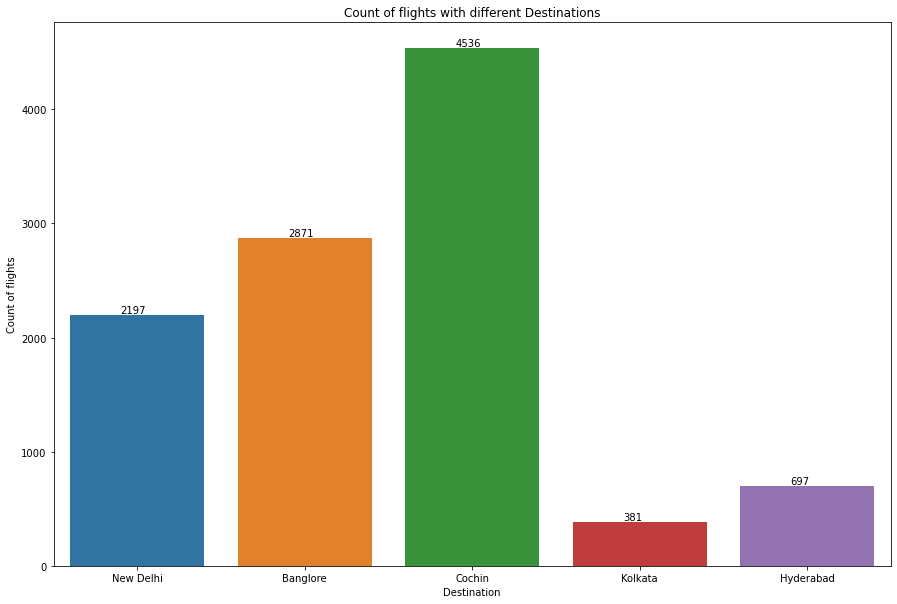

In [83]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Destinations')
ax=sns.countplot(x = 'Destination', data =df)
plt.xlabel('Destination')
plt.ylabel('Count of flights')
for x in ax.patches:
    ax.annotate(int(x.get_height()), (x.get_x()+0.30, x.get_height()+1), va='bottom',
                    color= 'black')

## Total Stops

In [84]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [85]:
df['Total_Stops'].replace({"non-stop": "0 stop"}, inplace = True)
# df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [86]:
df.Total_Stops.value_counts()

1 stop     5625
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

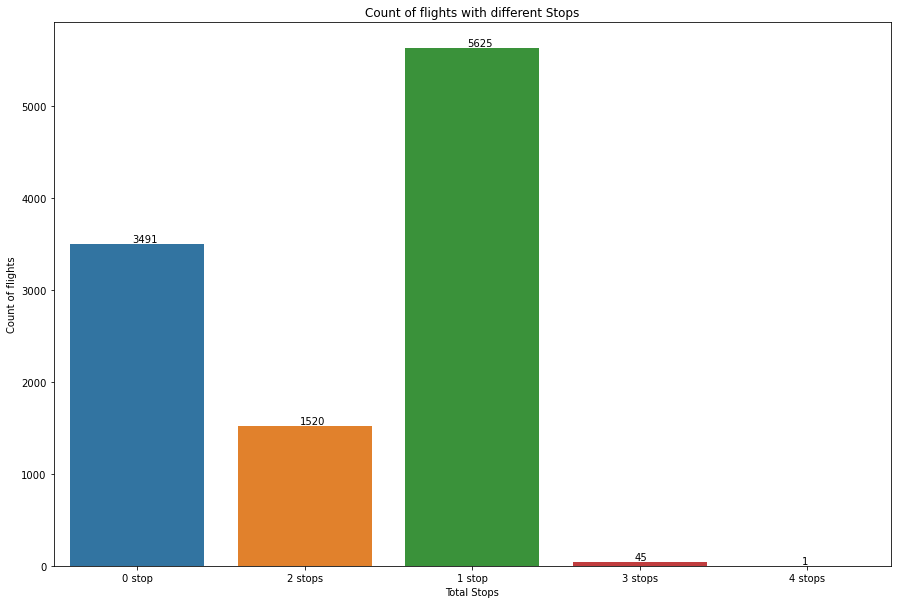

In [87]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Stops')
ax=sns.countplot(x = 'Total_Stops', data =df)
plt.xlabel('Total Stops')
plt.ylabel('Count of flights')
for x in ax.patches:
    ax.annotate(int(x.get_height()), (x.get_x()+0.37, x.get_height()+1), va='bottom',
                    color= 'black')

## Additional Information

In [88]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [89]:
df['Additional_Info']=df['Additional_Info'].str.replace('No info','No Info')

In [90]:
df.Additional_Info.value_counts()

No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

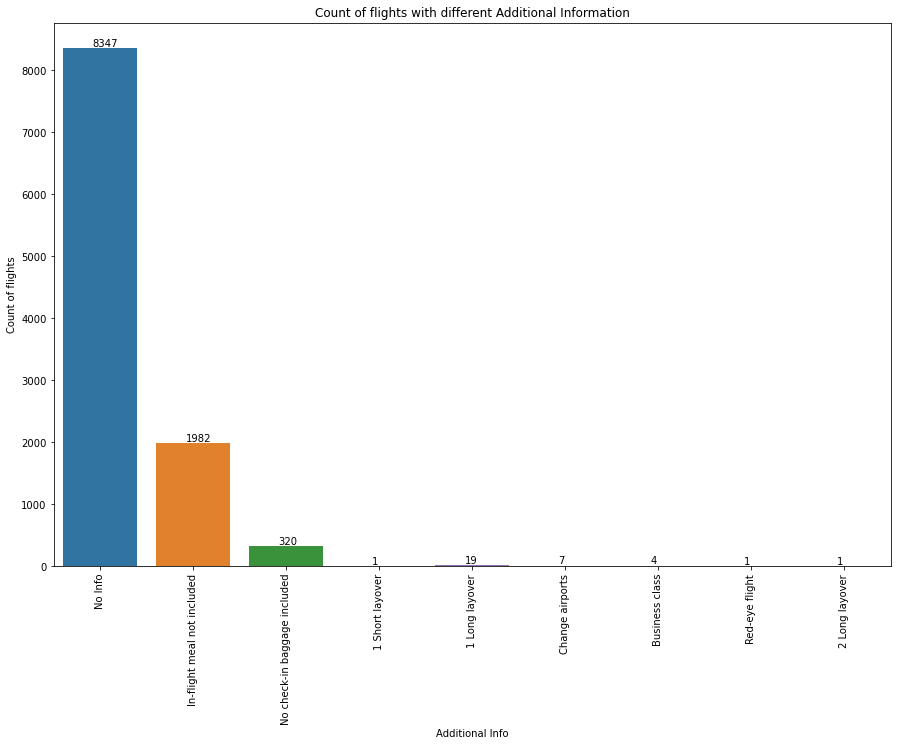

In [91]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Additional Information')
ax=sns.countplot(x = 'Additional_Info', data =df)
plt.xlabel('Additional Info')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for x in ax.patches:
    ax.annotate(int(x.get_height()), (x.get_x()+0.32, x.get_height()+1), va='bottom',
                    color= 'black')

In [92]:
# Convert dtypes of Date_of_Journey, Dep_Time and Arrival_Time to datetime.
df[["Date_of_Journey", "Dep_Time", "Arrival_Time"]] = df[["Date_of_Journey", "Dep_Time", "Arrival_Time"]].apply(pd.to_datetime)

In [93]:
# Date of Journey
df['Journey_Day']=df[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)

In [94]:
# Departure Time
df['Dep_Time_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Time_Minute'] = df['Dep_Time'].dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

In [95]:
# Arrival Time
df['Arr_Time_Hour'] = df['Arrival_Time'].dt.hour
df['Arr_Time_Minute'] = df['Arrival_Time'].dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

In [96]:
# Duration -- Convert Hours in Minutes.
df['Duration_In_Minute']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.drop('Duration',axis=1,inplace=True)

In [97]:
# Route
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]
df.drop('Route',axis=1,inplace=True)

In [98]:
# Replace NaN with None in Route_1,Route_2,Route_3,Route_4,Route_5
df.replace(np.nan,'None',inplace=True)

In [99]:
Airline = pd.get_dummies(df[["Airline"]],drop_first=True)
Source = pd.get_dummies(df[["Source"]],drop_first=True)
Destination = pd.get_dummies(df[["Destination"]],drop_first=True)

In [100]:
df_new=pd.concat([df,Airline,Source,Destination],axis=1)

In [101]:
df_new.drop(['Airline',"Source","Destination"],axis=1,inplace=True)

In [102]:
df_new.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Date', 'Journey_Month', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arr_Time_Hour', 'Arr_Time_Minute', 'Duration_In_Minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [103]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10682 non-null  object
 1   Additional_Info                            10682 non-null  object
 2   Price                                      10682 non-null  int64 
 3   Journey_Day                                10682 non-null  object
 4   Journey_Date                               10682 non-null  int64 
 5   Journey_Month                              10682 non-null  int64 
 6   Dep_Time_Hour                              10682 non-null  int64 
 7   Dep_Time_Minute                            10682 non-null  int64 
 8   Arr_Time_Hour                              10682 non-null  int64 
 9   Arr_Time_Minute                            10682 non-null  int64 
 10  Duration_In_Minute                

In [104]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


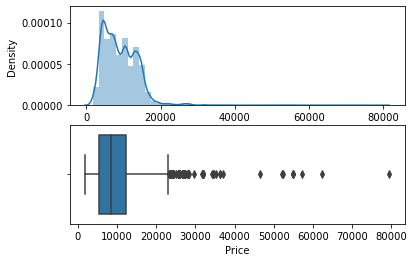

In [105]:
plot(df_new,'Price')

In [106]:
df_new['Price']=np.where(df_new['Price']>=40000,df_new['Price'].median(),df_new['Price'])

In [107]:
df_new.describe()

,Price,Journey_Date,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arr_Time_Hour,Arr_Time_Minute,Duration_In_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9046.090994,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,643.020502,0.163921,0.018161,...,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.065250,0.035667,0.205673
std,4387.489557,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,507.830133,0.370221,0.133541,...,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.246978,0.185468,0.404212
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,170.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,520.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,930.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,36983.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,2860.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder=df_new.iloc[:,[0,1,3,11,12,13,14,15]]
le = LabelEncoder()
for i in label_encoder:
    df_new[i] = le.fit_transform(df_new[i])

<AxesSubplot:>

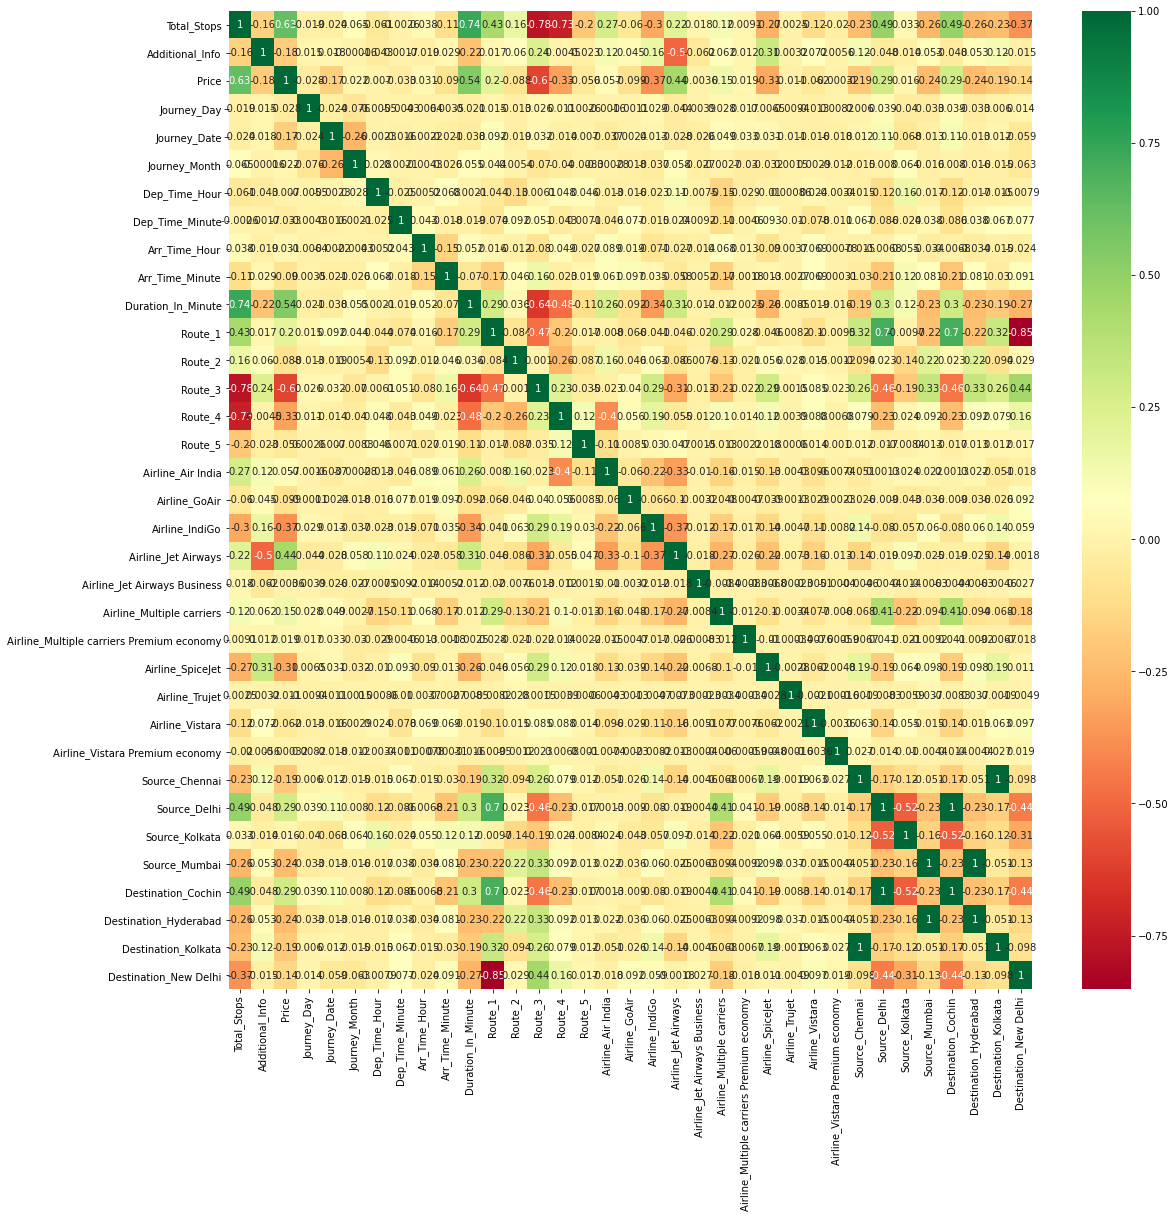

In [109]:
plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot = True, cmap = "RdYlGn")

In [110]:
x = df_new.drop(["Price"],axis=1)
y = df_new["Price"]

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor(random_state=0)
selection.fit(x,y)

ExtraTreesRegressor(random_state=0)

In [112]:
print(selection.feature_importances_)

[1.46955903e-01 8.44766779e-02 2.66698916e-02 8.87438915e-02
 5.80062802e-02 1.71491714e-02 1.97695092e-02 1.50490962e-02
 1.46455754e-02 6.32658247e-02 1.10832395e-02 2.31482497e-02
 2.24457820e-01 1.78999361e-02 5.09134251e-04 7.82108052e-03
 1.69936374e-03 1.75235231e-02 9.90030600e-02 2.89857154e-04
 2.54973929e-02 1.06386126e-03 6.84613827e-03 1.18668799e-04
 3.99117954e-03 8.39084326e-05 8.19863995e-04 3.75318545e-03
 4.10455849e-03 3.38638421e-03 3.14953653e-03 2.88693021e-03
 1.18809914e-03 4.94320723e-03]


<AxesSubplot:>

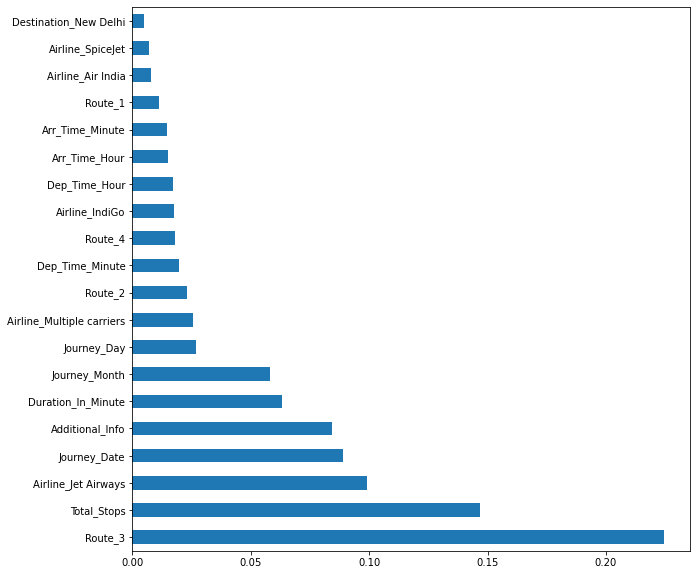

In [113]:
plt.figure(figsize = (10,10))
pd.Series(selection.feature_importances_,index=x.columns).nlargest(20).plot(kind='barh')

In [114]:
x= df_new.drop('Price',axis=1)
y=df_new.Price

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
model=RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 15,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 20,
 bootstrap= True)

In [118]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=15,
                      n_estimators=1000)

In [119]:
model.score(x_train,y_train)

0.9435984846358336

In [120]:
model.score(x_test,y_test)

0.9295313674527901

In [121]:
y_pred= model.predict(x_test)

In [122]:
from sklearn.metrics import r2_score

In [123]:
r2_score(y_test,y_pred)

0.9295313674527901

In [124]:
from sklearn import metrics

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 645.0069157271143
MSE: 1321025.8155916878
RMSE: 1149.3588715417338


<AxesSubplot:xlabel='Price', ylabel='Density'>

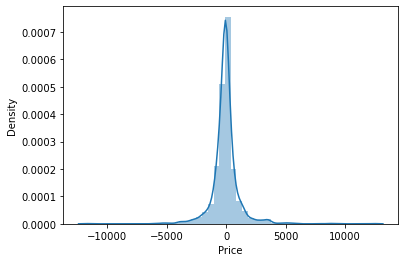

In [126]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'Actual Price')

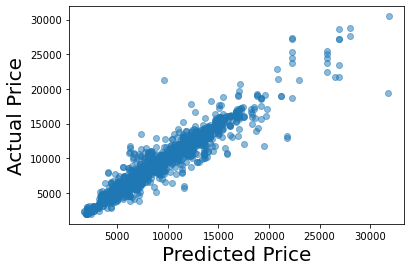

In [127]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Predicted Price',fontsize=20)
plt.ylabel('Actual Price',fontsize=20)

In [128]:
pd. set_option('display.max_rows', 10000000000)
pd.DataFrame(np.c_[y_test,y_pred.round(2)],columns=['Actual Price','Predicted Price'])

,Actual Price,Predicted Price
0,10703.0,10436.68
1,14053.0,14256.59
2,7480.0,7652.77
3,4049.0,4228.53
4,11841.0,9527.67
5,3898.0,3668.57
6,13882.0,13789.92
7,6961.0,6532.10
8,4030.0,4901.73
9,8518.0,8947.44


In [129]:
# Analysis :- Airline vs Price
# plt.figure(figsize = (10, 7))
# plt.title('Airline vs Price')
# ax=sns.scatterplot(x = 'Airline',y='Price', data=df.sort_values('Price',ascending=False))
# plt.xlabel('Airline')
# plt.ylabel('Price')
# plt.xticks(rotation = 90)
# for x in ax.patches:
#     ax.annotate(int(x.get_height()), (x.get_x()+0.32, x.get_height()+1), va='bottom',
#                     color= 'black')

In [130]:
# Analysis :- Source vs Price
# plt.figure(figsize = (10, 7))
# plt.title('Source vs Price')
# sns.scatterplot(x = 'Source',y='Price', data=df.sort_values('Price',ascending=False))
# plt.xlabel('Source')
# plt.ylabel('Price')

In [131]:
# df.columns

In [132]:
# Analysis :- Destination vs Price
# plt.figure(figsize = (10, 7))
# plt.title('Destination vs Price')
# ax=sns.scatterplot(x = 'Destination',y='Price', data=df.sort_values('Price',ascending=False))
# plt.xlabel('Destination')
# plt.ylabel('Price')